In [5]:
import sys
sys.path.insert(1, '../../unseen')
import warnings
warnings.filterwarnings('ignore')

import xarray as xr

import array_handling

In [2]:
infile = '/g/data/xv83/dbi599/seatac/tasmax_cafe-c5-d60-pX-f6_19900501-20201101_A-DEC-max_seatac.zarr.zip'

In [3]:
ds = xr.open_zarr(infile)

In [9]:
ds

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 62, lead_time: 9)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) datetime64[ns] 1991-05-01 1991-11-01 ... 2021-11-01
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
    time       (lead_time, init_date) datetime64[ns] dask.array<chunksize=(9, 62), meta=np.ndarray>
Data variables:
    tasmax     (init_date, lead_time, ensemble) float32 dask.array<chunksize=(1, 9, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Aug 11 12:56:49 2021: /g/data/e14/dbi599/miniconda3/envs/...
    title:      AccessOcean-AM2

In [6]:
ds_time = array_handling.reindex_forecast(ds)

In [7]:
ds_time

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 62, time: 78)
Coordinates:
  * time       (time) datetime64[ns] 1991-05-01 1991-11-01 ... 2029-11-01
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) datetime64[ns] 1991-05-01 1991-11-01 ... 2021-11-01
    lead_time  (init_date, time) float64 0.0 nan 1.0 nan 2.0 ... nan 7.0 nan 8.0
Data variables:
    tasmax     (init_date, time, ensemble) float32 dask.array<chunksize=(1, 78, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Aug 11 12:56:49 2021: /g/data/e14/dbi599/miniconda3/envs/...
    title:      AccessOcean-AM2

In [13]:
ds_time['tasmax'].isel({'ensemble': 0, 'init_date': 0}).values

array([28.803467,       nan, 36.737823,       nan, 27.867218,       nan,
       33.875732,       nan, 26.35556 ,       nan, 32.003784,       nan,
       33.724243,       nan, 27.360626,       nan, 39.443665,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan],
      dtype=float32)

In [24]:
max_by_year = ds_time['tasmax'].max(dim=('ensemble', 'init_date'), keep_attrs=True)
max_by_year = max_by_year.resample(time='A-DEC').max('time', keep_attrs=True)

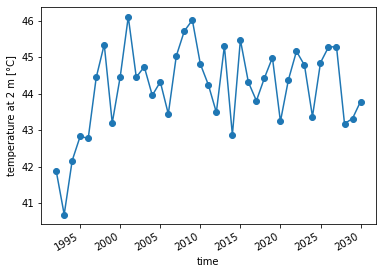

In [38]:
max_by_year.plot(marker='o')

In [28]:
count = ds_time['tasmax'].notnull(keep_attrs=True)

In [31]:
count = count.sum(dim=('ensemble', 'init_date'), keep_attrs=True)

In [32]:
count = count.resample(time='A-DEC').sum('time', keep_attrs=True)

In [37]:
count['time']

<xarray.DataArray 'time' (time: 39)>
array(['1991-12-31T00:00:00.000000000', '1992-12-31T00:00:00.000000000',
       '1993-12-31T00:00:00.000000000', '1994-12-31T00:00:00.000000000',
       '1995-12-31T00:00:00.000000000', '1996-12-31T00:00:00.000000000',
       '1997-12-31T00:00:00.000000000', '1998-12-31T00:00:00.000000000',
       '1999-12-31T00:00:00.000000000', '2000-12-31T00:00:00.000000000',
       '2001-12-31T00:00:00.000000000', '2002-12-31T00:00:00.000000000',
       '2003-12-31T00:00:00.000000000', '2004-12-31T00:00:00.000000000',
       '2005-12-31T00:00:00.000000000', '2006-12-31T00:00:00.000000000',
       '2007-12-31T00:00:00.000000000', '2008-12-31T00:00:00.000000000',
       '2009-12-31T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-12-31T00:00:00.000000000', '2012-12-31T00:00:00.000000000',
       '2013-12-31T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-12-31T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2021-12-31T00:00:00.000000000', '2022-12-31T00:00:00.000000000',
       '2023-12-31T00:00:00.000000000', '2024-12-31T00:00:00.000000000',
       '2025-12-31T00:00:00.000000000', '2026-12-31T00:00:00.000000000',
       '2027-12-31T00:00:00.000000000', '2028-12-31T00:00:00.000000000',
       '2029-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1991-12-31 1992-12-31 ... 2029-12-31

In [33]:
count.values

array([ 192,  384,  576,  768,  960, 1152, 1344, 1536, 1728, 1728, 1728,
       1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728,
       1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1728, 1536, 1344,
       1152,  960,  768,  576,  384,  192])

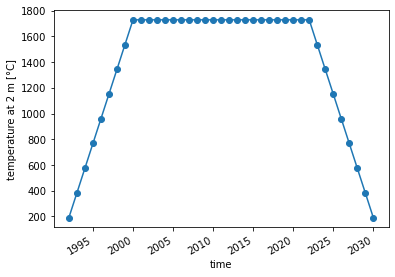

In [41]:
count.plot(marker='o')